# Crypto Fear and Greed Index correlation with Crypto Market

## BTC

Get BTC price data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

import sys
sys.path.append('../src')
from data_load.csvs import get_asset_price_history
from strategies import WeeklyFNGDCA

sns.set_theme(style="whitegrid")


# Set experiment parameters

START = "2017-01-01"
END = "2022-05-08"
ASSET = "BTC"
WEEKLY_INVESTMENT = 100

# Collect BTC data

df = get_asset_price_history(ASSET, START, END)


Join FNG with BTC data

In [2]:
df = WeeklyFNGDCA(WEEKLY_INVESTMENT, "Tuesday").preprocess(df)
df.tail()

,Open,High,Low,Close,Adj Close,Volume,FNG,FNGClass,day_of_week
Date,,,,,,,,,
2022-05-04,37748.011719,39902.949219,37732.058594,39698.371094,39698.371094,36754404490,21.0,Extreme Fear,Wednesday
2022-05-05,39695.746094,39789.281250,35856.515625,36575.140625,36575.140625,43106256317,27.0,Fear,Thursday
2022-05-06,36573.183594,36624.359375,35482.132813,36040.921875,36040.921875,37795577489,22.0,Extreme Fear,Friday
2022-05-07,36042.503906,36129.925781,34940.824219,35501.953125,35501.953125,24375896406,23.0,Extreme Fear,Saturday
2022-05-08,35502.941406,35502.941406,33878.964844,34059.265625,34059.265625,36763041910,18.0,Extreme Fear,Sunday


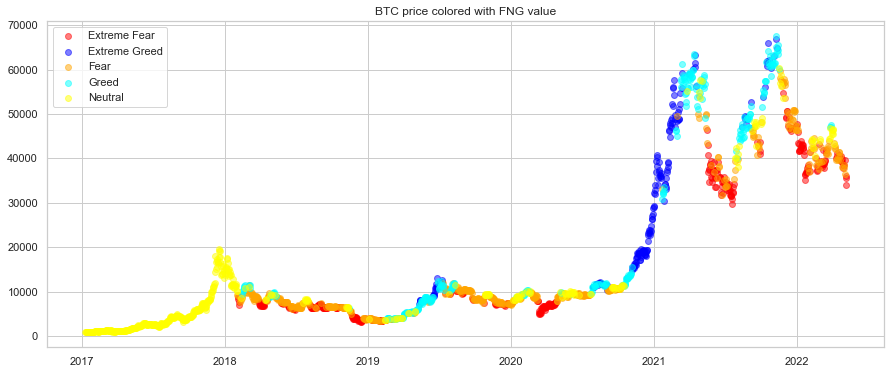

In [21]:
ASSET = "BTC"

# Collect ETH data
df = get_asset_price_history(ASSET, START, END)
# Add FNG data
df = WeeklyFNGDCA(WEEKLY_INVESTMENT, "Tuesday").preprocess(df)


# fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20, 12))

# ax[0].plot(df.index, df.Close)
# ax[0].set_title(f"{ASSET} price movement from {START} to {END}")

# ax[1].plot(df.index, df.FNG)
# ax[1].set_title(f"Fear and Greed Index values from {START} to {END}")

fig, ax = plt.subplots(figsize=(15, 6))

for fng_class, df_fng in df.groupby("FNGClass"):
    colors = {
        "Extreme Fear": "red",
        "Fear": "orange",
        "Neutral": "yellow",
        "Greed": "cyan",
        "Extreme Greed": "blue",
    }
    # ax[2].scatter(df_fng.index, df_fng.Close, color=colors[fng_class], marker="o", alpha=0.5, label=fng_class)
    ax.scatter(df_fng.index, df_fng.Close, color=colors[fng_class], marker="o", alpha=0.5, label=fng_class)
    
# ax[2].set_title(f"{ASSET} price colored with FNG value")
# ax[2].legend()
ax.set_title(f"{ASSET} price colored with FNG value")
ax.legend()

In [4]:
df = df.assign(relative_price_change=(df.Close - df.Close.rolling(window=30).mean())/df.Close.rolling(window=30).mean())
df = df.assign(relative_fng=(df.FNG - 50) / 50)

## FNG Correlation with BTC Price overtime

  0%|          | 0/1276 [00:00<?, ?it/s]

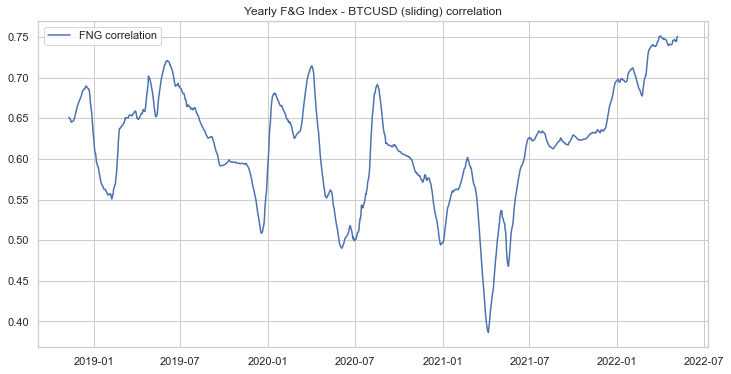

In [10]:
all_dates = pd.date_range(df.index.min(), df.index.max())
WINDOW_LENGTH = 365

dates = []
fng_correlation = []

for i in tqdm(range(len(all_dates) - WINDOW_LENGTH - 1)):
    start = all_dates[i]
    end = all_dates[i + WINDOW_LENGTH]
    df_window = df[start:end]
    dates.append(end)
    fng_correlation.append(df_window.corr()["relative_fng"]["relative_price_change"])

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(dates, fng_correlation, label="FNG correlation")
ax.set_title("Yearly F&G Index - BTCUSD (sliding) correlation")
ax.legend()

## ETH

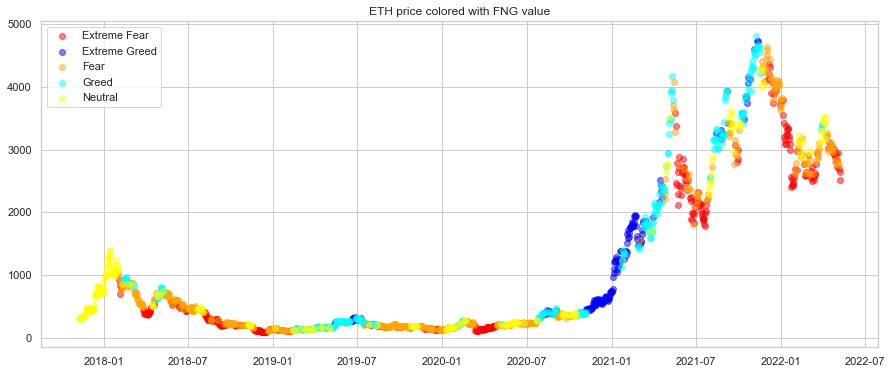

In [20]:
ASSET = "ETH"

# Collect ETH data
df = get_asset_price_history(ASSET, START, END)
# Add FNG data
df = WeeklyFNGDCA(WEEKLY_INVESTMENT, "Tuesday").preprocess(df)


# fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20, 12))

# ax[0].plot(df.index, df.Close)
# ax[0].set_title(f"{ASSET} price movement from {START} to {END}")

# ax[1].plot(df.index, df.FNG)
# ax[1].set_title(f"Fear and Greed Index values from {START} to {END}")

fig, ax = plt.subplots(figsize=(15, 6))

for fng_class, df_fng in df.groupby("FNGClass"):
    colors = {
        "Extreme Fear": "red",
        "Fear": "orange",
        "Neutral": "yellow",
        "Greed": "cyan",
        "Extreme Greed": "blue",
    }
    # ax[2].scatter(df_fng.index, df_fng.Close, color=colors[fng_class], marker="o", alpha=0.5, label=fng_class)
    ax.scatter(df_fng.index, df_fng.Close, color=colors[fng_class], marker="o", alpha=0.5, label=fng_class)
    
# ax[2].set_title(f"{ASSET} price colored with FNG value")
# ax[2].legend()
ax.set_title(f"{ASSET} price colored with FNG value")
ax.legend()

  0%|          | 0/1276 [00:00<?, ?it/s]

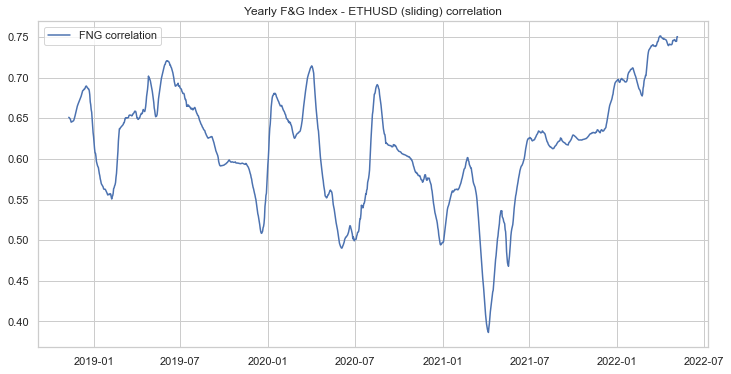

In [11]:
df = df.assign(relative_price_change=(df.Close - df.Close.rolling(window=30).mean())/df.Close.rolling(window=30).mean())
df = df.assign(relative_fng=(df.FNG - 50) / 50)

all_dates = pd.date_range(df.index.min(), df.index.max())
WINDOW_LENGTH = 365

dates = []
fng_correlation = []

for i in tqdm(range(len(all_dates) - WINDOW_LENGTH - 1)):
    start = all_dates[i]
    end = all_dates[i + WINDOW_LENGTH]
    df_window = df[start:end]
    dates.append(end)
    fng_correlation.append(df_window.corr()["relative_fng"]["relative_price_change"])

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(dates, fng_correlation, label="FNG correlation")
ax.set_title("Yearly F&G Index - ETHUSD (sliding) correlation")
ax.legend()

  0%|          | 0/1580 [00:00<?, ?it/s]

  0%|          | 0/1276 [00:00<?, ?it/s]

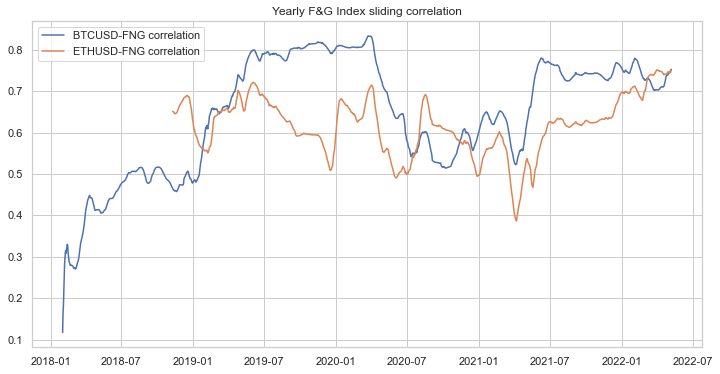

In [17]:
df_btc = WeeklyFNGDCA(WEEKLY_INVESTMENT, "Tuesday").preprocess(get_asset_price_history("BTC", START, END))
df_eth = WeeklyFNGDCA(WEEKLY_INVESTMENT, "Tuesday").preprocess(get_asset_price_history("ETH", START, END))


fig, ax = plt.subplots(figsize=(12, 6))

def plot_corr(df, ax, asset):
    df = df.assign(relative_price_change=(df.Close - df.Close.rolling(window=30).mean())/df.Close.rolling(window=30).mean())
    df = df.assign(relative_fng=(df.FNG - 50) / 50)

    all_dates = pd.date_range(df.index.min(), df.index.max())
    WINDOW_LENGTH = 365

    dates = []
    fng_correlation = []

    for i in tqdm(range(len(all_dates) - WINDOW_LENGTH - 1)):
        start = all_dates[i]
        end = all_dates[i + WINDOW_LENGTH]
        df_window = df[start:end]
        dates.append(end)
        fng_correlation.append(df_window.corr()["relative_fng"]["relative_price_change"])

    ax.plot(dates, fng_correlation, label=f"{asset}USD-FNG correlation")
    ax.legend()


ax.set_title("Yearly F&G Index sliding correlation")

plot_corr(df_btc, ax, "BTC")
plot_corr(df_eth, ax, "ETH")